In [86]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pl
import numpy as np

In [2]:
%matplotlib inline

In [3]:
dfWind = pd.read_pickle('dfDayWind.pkl')
dfStrand = pd.read_pickle('./dfStrandedReindexed.pkl')

In [8]:
dfStrand.head()

,stranded,herded,lat,lon
date,,,,
1999-03-07,6.0,0.0,41.916667,70.033333
1999-03-08,0.0,0.0,0.000000,0.000000
1999-03-09,0.0,0.0,0.000000,0.000000
1999-03-10,0.0,0.0,0.000000,0.000000
1999-03-11,0.0,0.0,0.000000,0.000000


In [4]:
dfWind.head()

,WVHT_min,WVHT_max,WVHT_median,WTMP_min,WTMP_max,WTMP_median,East_min,East_max,East_median,North_min,North_max,North_median
datetime,,,,,,,,,,,,
1999-01-01,1.15,3.39,1.585,5.6,5.9,5.80,-16.536832,-0.562378,-8.951336,-7.067716,3.531732,-2.577027
1999-01-02,1.24,4.01,2.020,5.6,5.8,5.60,-16.564291,-5.562570,-8.798599,-3.404929,7.695768,2.027267
1999-01-03,0.58,4.17,1.230,5.6,5.6,5.60,-8.049343,16.840213,5.706339,-6.878073,3.912590,-1.854102
1999-01-04,3.68,5.82,4.560,5.6,5.8,5.65,-12.363851,15.895691,-9.928442,-15.464482,-2.903063,-6.238327
1999-01-05,1.61,3.61,2.610,5.5,5.6,5.60,-11.823519,-4.886402,-9.219372,-4.850000,2.770363,-1.476008


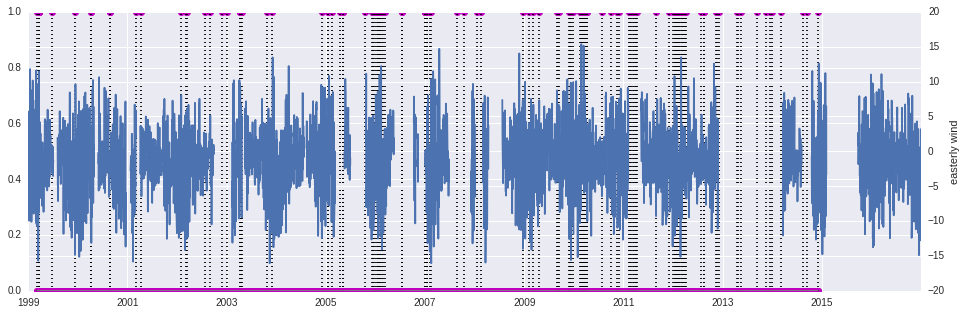

In [33]:
f, ax=pl.subplots(figsize=(16,5))
#pl.stem()
ax.stem(dfStrand.index, dfStrand.events, basefmt='gray', linefmt='k:', markerfmt='mo')
ax2 = ax.twinx()
ax2.plot(dfWind.index, dfWind.East_median)
ax.set_ylim=((-0.2, 1.2))
ax2.set_ylim=(-17, 17)
ax2.set_ylabel('easterly wind')

In [7]:
dfStrand.head()

,stranded,herded,lat,lon
date,,,,
1999-03-07,6.0,0.0,41.916667,70.033333
1999-03-08,0.0,0.0,0.000000,0.000000
1999-03-09,0.0,0.0,0.000000,0.000000
1999-03-10,0.0,0.0,0.000000,0.000000
1999-03-11,0.0,0.0,0.000000,0.000000


In [9]:
def MarkEvents(row):
    return int(row['stranded'] + row['herded']>0)

In [10]:
dfStrand['events'] = dfStrand.apply(MarkEvents, axis=1)

In [11]:
dfStrand.head()

,stranded,herded,lat,lon,events
date,,,,,
1999-03-07,6.0,0.0,41.916667,70.033333,1
1999-03-08,0.0,0.0,0.000000,0.000000,0
1999-03-09,0.0,0.0,0.000000,0.000000,0
1999-03-10,0.0,0.0,0.000000,0.000000,0
1999-03-11,0.0,0.0,0.000000,0.000000,0


In [35]:
strandedDateRange = pd.date_range(dfStrand.index[0], dfStrand.index[-1])

In [36]:
strandedDateRange

DatetimeIndex(['1999-03-07', '1999-03-08', '1999-03-09', '1999-03-10',
               '1999-03-11', '1999-03-12', '1999-03-13', '1999-03-14',
               '1999-03-15', '1999-03-16',
               ...
               '2014-11-25', '2014-11-26', '2014-11-27', '2014-11-28',
               '2014-11-29', '2014-11-30', '2014-12-01', '2014-12-02',
               '2014-12-03', '2014-12-04'],
              dtype='datetime64[ns]', length=5752, freq='D')

In [37]:
dfMerged  = pd.merge(dfStrand, dfWind, left_index=True, right_index=True)

In [39]:
dfMerged.shape

(5752, 17)

In [40]:
dfStrand.shape

(5752, 5)

In [47]:
dfMerged['East_range'] = dfMerged.East_max-dfMerged.East_min
dfMerged['North_range'] = dfMerged.North_max- dfMerged.North_min

In [48]:
dfMerged.head()

,stranded,herded,lat,lon,events,WVHT_min,WVHT_max,WVHT_median,WTMP_min,WTMP_max,WTMP_median,East_min,East_max,East_median,North_min,North_max,North_median,East_range,North_range
1999-03-07,6.0,0.0,41.916667,70.033333,1,2.31,5.26,3.875,4.0,4.0,4.00,-13.435029,15.524732,-0.749539,1.421587,18.022879,13.371408,28.959760,16.601292
1999-03-08,0.0,0.0,0.000000,0.000000,0,3.52,5.54,4.140,3.6,4.0,3.85,-12.851180,-9.447250,-10.737757,8.549075,13.307786,11.000586,3.403930,4.758711
1999-03-09,0.0,0.0,0.000000,0.000000,0,1.94,4.80,3.250,3.6,3.6,3.60,-10.605996,-5.888349,-8.397990,4.267511,13.106433,10.027364,4.717646,8.838922
1999-03-10,0.0,0.0,0.000000,0.000000,0,1.29,1.84,1.700,3.6,3.6,3.60,-7.129723,-3.904318,-5.656693,3.858431,7.662656,6.234088,3.225405,3.804225
1999-03-11,0.0,0.0,0.000000,0.000000,0,1.27,2.84,2.270,3.6,3.6,3.60,-7.706581,-1.850847,-6.146941,5.573586,10.219100,8.016984,5.855734,4.645514


In [49]:
dfAllSmall = pd.DataFrame(index=dfMerged.index)

In [59]:
dfAllSmall = dfMerged[['events', 'WVHT_median', 'WTMP_median', 'East_median', 'East_range',
                       'North_median', 'North_range']]

In [60]:
dfAllSmall.loc[:,'month'] = dfAllSmall.index.month.values

/home/madhatter106/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/madhatter106/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [61]:
dfAllSmall.rename(columns={'events': 'Stranding_events'}, inplace=True)

/home/madhatter106/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [62]:
dfAllSmall.head()

,Stranding_events,WVHT_median,WTMP_median,East_median,East_range,North_median,North_range,month
1999-03-07,1,3.875,4.00,-0.749539,28.959760,13.371408,16.601292,3
1999-03-08,0,4.140,3.85,-10.737757,3.403930,11.000586,4.758711,3
1999-03-09,0,3.250,3.60,-8.397990,4.717646,10.027364,8.838922,3
1999-03-10,0,1.700,3.60,-5.656693,3.225405,6.234088,3.804225,3
1999-03-11,0,2.270,3.60,-6.146941,5.855734,8.016984,4.645514,3


In [63]:
dfAllSmall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5752 entries, 1999-03-07 to 2014-12-04
Data columns (total 8 columns):
Stranding_events    5752 non-null int64
WVHT_median         4107 non-null float64
WTMP_median         4107 non-null float64
East_median         4107 non-null float64
East_range          4107 non-null float64
North_median        4107 non-null float64
North_range         4107 non-null float64
month               5752 non-null int64
dtypes: float64(6), int64(2)
memory usage: 404.4 KB


In [64]:
dfAllSmallClean = dfAllSmall.dropna()

In [65]:
dfAllSmallClean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4107 entries, 1999-03-07 to 2014-12-04
Data columns (total 8 columns):
Stranding_events    4107 non-null int64
WVHT_median         4107 non-null float64
WTMP_median         4107 non-null float64
East_median         4107 non-null float64
East_range          4107 non-null float64
North_median        4107 non-null float64
North_range         4107 non-null float64
month               4107 non-null int64
dtypes: float64(6), int64(2)
memory usage: 288.8 KB


In [87]:
dfAllSmallClean.to_pickle('dfMergedAndCleaned.pkl')

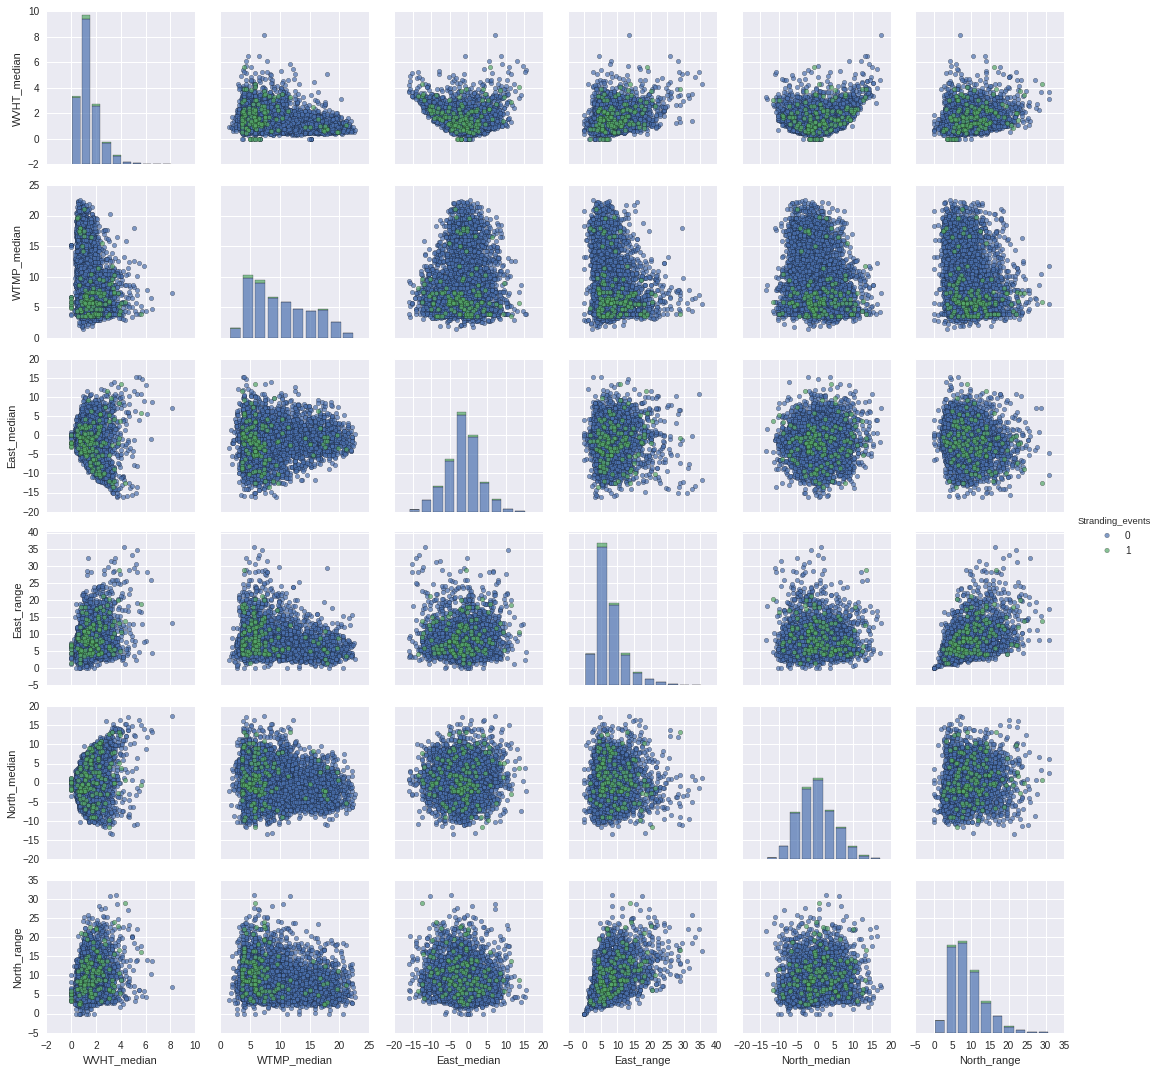

In [83]:
g = sb.PairGrid(dfAllSmallClean, vars=['WVHT_median', 'WTMP_median',
                                       'East_median', 'East_range',
                                       'North_median', 'North_range'],hue='Stranding_events')
gdiag = g.map_diag(pl.hist, alpha=0.7)
godiag = g.map_offdiag(pl.scatter, alpha=0.7, edgecolor='k')
g.add_legend()

In [ ]:
with pm.Model() as mlog1:
    

In [ ]:
def ShiftFeature(df, feat, shiftrange=8):
    dfShft = pd.concat([df[feat].shift(i) for i in range(8)], axis=1)
    dfShft.columns = ["t-%d" %i for i in range(shiftrange)]

In [74]:
dfShftdMedEastWind = pd.concat([dfAllSmallClean.East_median.shift(i) for i in range(8)], axis=1)
dfShftdMedEastWind.columns = ["t-%d"  %i for i in range(8)]

In [78]:
dfShftdMedEastWind['EventTF'] = dfAllSmallClean.Stranding_events
dfShftdMedEastWind.dropna(inplace=True)
dfShftdMedEastWind.head(10)

,t-0,t-1,t-2,t-3,t-4,t-5,t-6,t-7,EventTF
1999-03-14,-1.775738e-15,-2.139899e+00,-1.878293e+00,-6.146941e+00,-5.656693e+00,-8.397990e+00,-1.073776e+01,-7.495394e-01,0
1999-03-15,3.940054e+00,-1.775738e-15,-2.139899e+00,-1.878293e+00,-6.146941e+00,-5.656693e+00,-8.397990e+00,-1.073776e+01,0
1999-03-16,-1.569044e+01,3.940054e+00,-1.775738e-15,-2.139899e+00,-1.878293e+00,-6.146941e+00,-5.656693e+00,-8.397990e+00,0
1999-03-17,-7.691582e+00,-1.569044e+01,3.940054e+00,-1.775738e-15,-2.139899e+00,-1.878293e+00,-6.146941e+00,-5.656693e+00,0
1999-03-18,-6.057873e-01,-7.691582e+00,-1.569044e+01,3.940054e+00,-1.775738e-15,-2.139899e+00,-1.878293e+00,-6.146941e+00,1
1999-03-19,-8.777362e+00,-6.057873e-01,-7.691582e+00,-1.569044e+01,3.940054e+00,-1.775738e-15,-2.139899e+00,-1.878293e+00,1
1999-03-20,-7.998849e+00,-8.777362e+00,-6.057873e-01,-7.691582e+00,-1.569044e+01,3.940054e+00,-1.775738e-15,-2.139899e+00,1
1999-03-21,6.625000e-01,-7.998849e+00,-8.777362e+00,-6.057873e-01,-7.691582e+00,-1.569044e+01,3.940054e+00,-1.775738e-15,1
1999-03-22,1.148504e+01,6.625000e-01,-7.998849e+00,-8.777362e+00,-6.057873e-01,-7.691582e+00,-1.569044e+01,3.940054e+00,1
1999-03-23,-3.927224e+00,1.148504e+01,6.625000e-01,-7.998849e+00,-8.777362e+00,-6.057873e-01,-7.691582e+00,-1.569044e+01,0


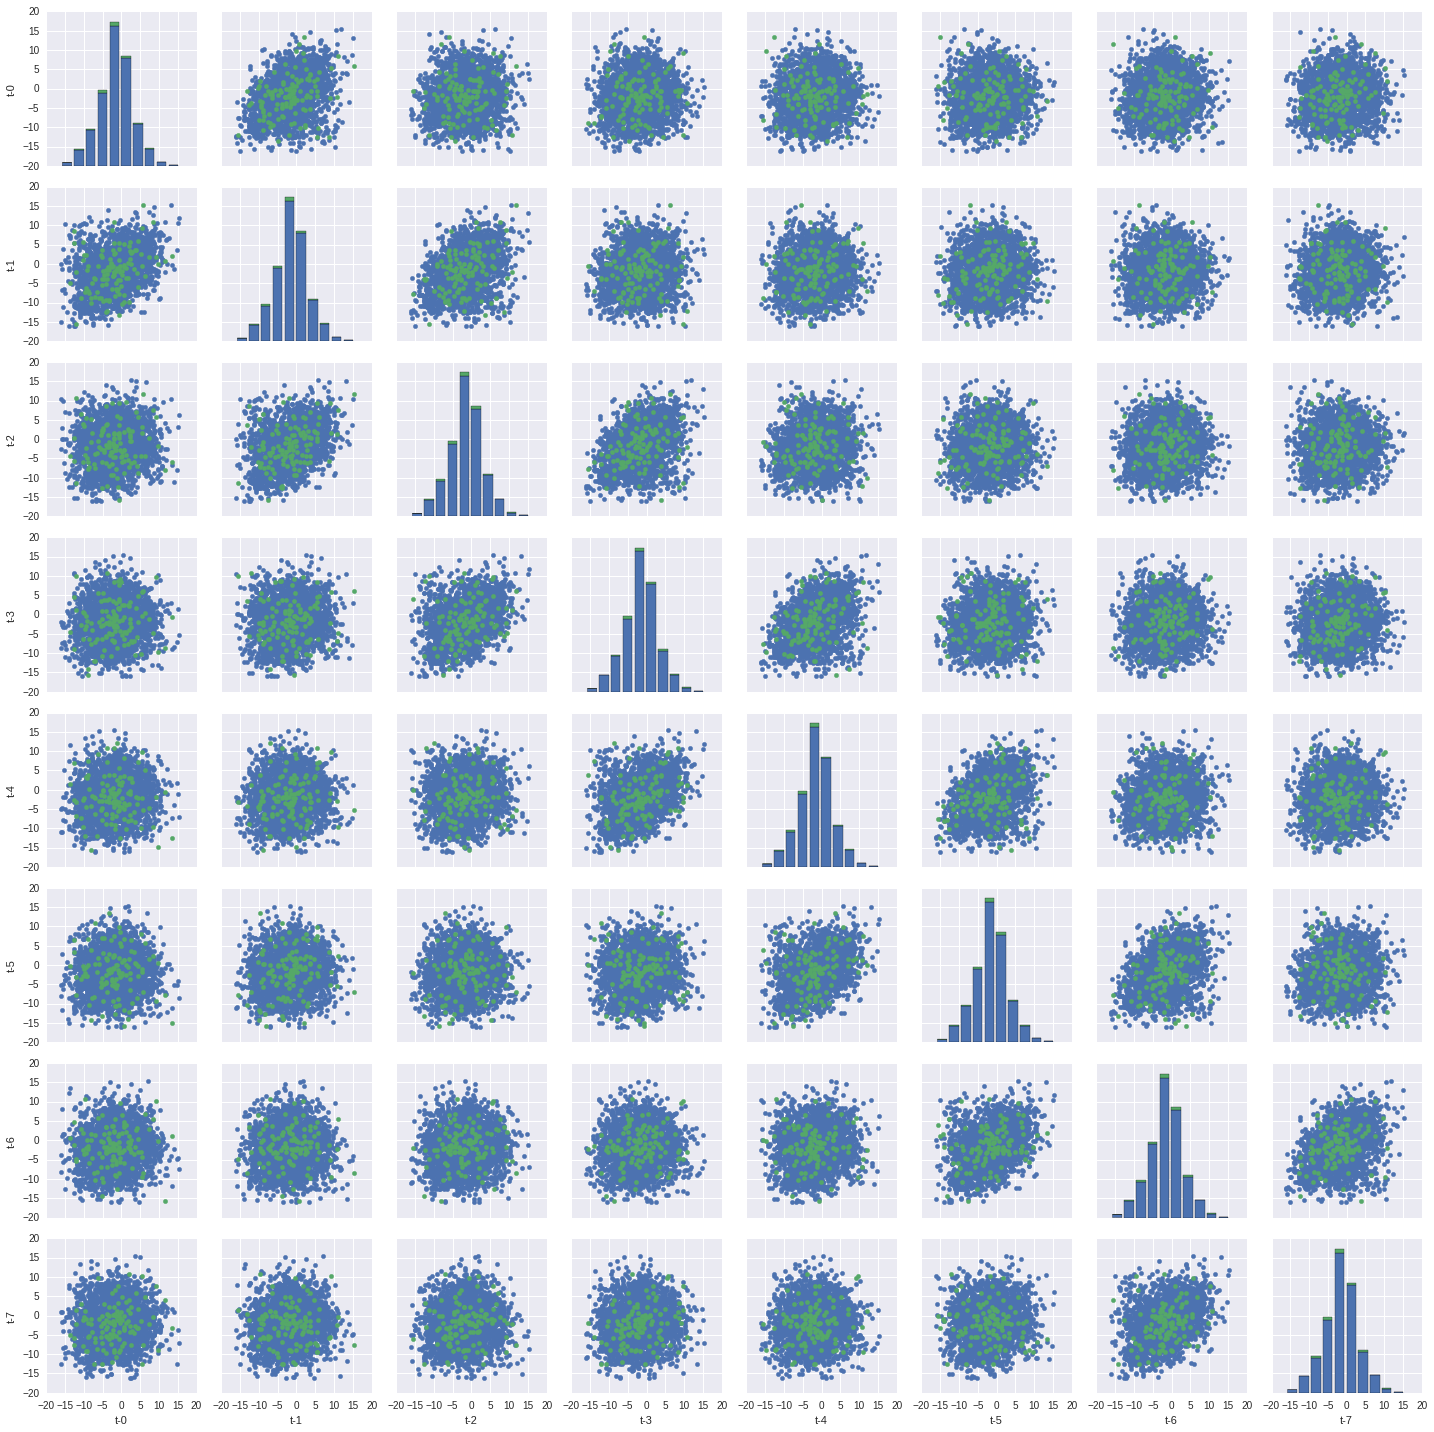

In [79]:
g = sb.PairGrid(dfShftdMedEastWind, vars=["t-%d" %i for i in range(8)], hue='EventTF')
g.map_diag(pl.hist)
g.map_offdiag(pl.scatter)

In [ ]:
dfShftdMedEastWind = pd.concat([dfAllSmallClean.East_median.shift(i) for i in range(8)], axis=1)
dfShftdMedEastWind.columns = ["t-%d"  %i for i in range(8)]